# PSO effective-mass

20 November 2019

Another probe of the effective mass function, this time fitting to a small number of interlopers as subhalos.

This notebook is run with $m_d = 10^7 M_\odot$.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from multiprocessing import Pool

from pso import PSOFit

from helpers import get_mass_back

In [2]:
## General settings ##
zl = .5
zs = 1.0

In [3]:
# zds = [.1,.2,.3,.4,.5,.6,.7,.8,.9] * 2
# seeds = [100] * 9 + [101] * 9
# zds = [.1,.2,.3, .4,.5,.6,.9]
# seeds = [100]*7
zds = [.3]*4+[.5]*4+[.7]*4
seeds = [101,102,103,104]*3
assert(len(zds) == len(seeds))
ilist = range(len(zds))
ncores = 4
N=1 # number of subhalos

In [4]:
def pso_fit_func(i, zd, seed):
    '''
    Just a helper function for multiprocessing.Pool
    '''
    print('running', i)
    ans = PSOFit(N=N, zd=zd, zl=zl, zs=zs,seed=seed, numiter=300, near_ring=True)

    #pso_fit_list[i] = ans
    #ans = 'PSOFIT{}'.format(i)
    return i, ans

class CallbackList:
    def __init__(self,length):
        self.liszt = [None]*length
    
    def __repr__(self):
        return 'CallbackList'+self.liszt.__repr__()
    
    def callback(self, result):
        print('callback')
        assert(len(result) == 2)
        self.liszt[result[0]] = result[1]
        print('my list is now', self.liszt)

pso_fit_callback_list2 = CallbackList(len(zds))

In [5]:
%%time
with Pool(ncores) as pool:
    p_list = []
    for i, zd, seed in zip(ilist, zds, seeds):
        p = pool.apply_async(pso_fit_func, args=(i,zd, seed), callback=pso_fit_callback_list2.callback)
        p_list.append(p)

    for p in p_list:
        p.wait()
        
    for p in p_list:
        p.get()

running 2
running 1
running 0
running 3


2019-11-30 12:55:29,993 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c2': 0.3, 'c1': 0.5, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/3002019-11-30 12:55:30,010 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c2': 0.3, 'c1': 0.5, 'w': 0.9}
2019-11-30 12:55:30,001 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c2': 0.3, 'c1': 0.5, 'w': 0.9}
2019-11-30 12:55:30,014 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c2': 0.3, 'c1': 0.5, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|300/300, best_cost=0.000589
2019-11-30 13:04:40,633 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0005889703304461619, best pos: [-7.40776527e-03 -4.73317294e+00  9.26946444e-01  8.94817757e+00]


running 4


2019-11-30 13:04:40,793 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c2': 0.3, 'c1': 0.5, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/300

callback
my list is now [None, None, None, <pso.PSOFit object at 0x7f14c5a0d320>, None, None, None, None, None, None, None, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=0.002766
2019-11-30 13:05:10,335 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0027566788867552532, best pos: [-0.71441149 -4.2986007  -4.5891763  -9.17335217]


running 5


2019-11-30 13:05:10,480 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c2': 0.3, 'c1': 0.5, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/300

callback
my list is now [None, <pso.PSOFit object at 0x7f14c5a0dd68>, None, <pso.PSOFit object at 0x7f14c5a0d320>, None, None, None, None, None, None, None, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=0.000408
2019-11-30 13:05:33,131 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0004076283008392897, best pos: [-1.31828544e-04 -4.69574262e+00  4.29969639e+00  8.68928171e+00]


running 6


2019-11-30 13:05:33,271 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c2': 0.3, 'c1': 0.5, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|300/300, best_cost=0.000756
2019-11-30 13:05:33,360 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0007561491428406752, best pos: [-0.56117964 -4.40168627 -9.23983393 -4.2946378 ]
pyswarms.single.global_best:   4%|▍         |12/300, best_cost=0.0226

callback
my list is now [None, <pso.PSOFit object at 0x7f14c5a0dd68>, <pso.PSOFit object at 0x7f14c5a22e80>, <pso.PSOFit object at 0x7f14c5a0d320>, None, None, None, None, None, None, None, None]
running 7


2019-11-30 13:05:33,508 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c2': 0.3, 'c1': 0.5, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/300

callback
my list is now [<pso.PSOFit object at 0x7f14c5a0de10>, <pso.PSOFit object at 0x7f14c5a0dd68>, <pso.PSOFit object at 0x7f14c5a22e80>, <pso.PSOFit object at 0x7f14c5a0d320>, None, None, None, None, None, None, None, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=1.28e-12
2019-11-30 13:14:15,028 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.2832136453028472e-12, best pos: [-0.78321276 -4.13821032 -9.1047789  -4.33111449]


running 8


2019-11-30 13:14:15,173 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c2': 0.3, 'c1': 0.5, 'w': 0.9}
pyswarms.single.global_best:  91%|█████████ |272/300, best_cost=1.65e-12

callback
my list is now [<pso.PSOFit object at 0x7f14c5a0de10>, <pso.PSOFit object at 0x7f14c5a0dd68>, <pso.PSOFit object at 0x7f14c5a22e80>, <pso.PSOFit object at 0x7f14c5a0d320>, <pso.PSOFit object at 0x7f14c5a0dfd0>, None, None, None, None, None, None, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=2e-7   0
2019-11-30 13:14:45,290 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.0046036586151187e-07, best pos: [-0.78033533 -4.13997151 -4.59328554 -9.15457874]


running 9


2019-11-30 13:14:45,434 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c2': 0.3, 'c1': 0.5, 'w': 0.9}
pyswarms.single.global_best:   5%|▌         |16/300, best_cost=5.41e-5

callback
my list is now [<pso.PSOFit object at 0x7f14c5a0de10>, <pso.PSOFit object at 0x7f14c5a0dd68>, <pso.PSOFit object at 0x7f14c5a22e80>, <pso.PSOFit object at 0x7f14c5a0d320>, <pso.PSOFit object at 0x7f14c5a0dfd0>, <pso.PSOFit object at 0x7f14c5a22630>, None, None, None, None, None, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=9.43e-11
2019-11-30 13:15:08,449 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 9.43414012418321e-11, best pos: [-0.78322812 -4.13819416  4.54402001  8.81060338]
pyswarms.single.global_best:   4%|▍         |12/300, best_cost=5.59e-5

running 10


2019-11-30 13:15:08,600 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c2': 0.3, 'c1': 0.5, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/300

callback
my list is now [<pso.PSOFit object at 0x7f14c5a0de10>, <pso.PSOFit object at 0x7f14c5a0dd68>, <pso.PSOFit object at 0x7f14c5a22e80>, <pso.PSOFit object at 0x7f14c5a0d320>, <pso.PSOFit object at 0x7f14c5a0dfd0>, <pso.PSOFit object at 0x7f14c5a22630>, <pso.PSOFit object at 0x7f14fdf3dd68>, None, None, None, None, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=1.01e-12
2019-11-30 13:15:09,480 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.0062793703419081e-12, best pos: [-0.78327607 -4.13815368  1.26733297  9.236402  ]


running 11


2019-11-30 13:15:09,616 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c2': 0.3, 'c1': 0.5, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/300

callback
my list is now [<pso.PSOFit object at 0x7f14c5a0de10>, <pso.PSOFit object at 0x7f14c5a0dd68>, <pso.PSOFit object at 0x7f14c5a22e80>, <pso.PSOFit object at 0x7f14c5a0d320>, <pso.PSOFit object at 0x7f14c5a0dfd0>, <pso.PSOFit object at 0x7f14c5a22630>, <pso.PSOFit object at 0x7f14fdf3dd68>, <pso.PSOFit object at 0x7f14fdf3da58>, None, None, None, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=4.7e-55
2019-11-30 13:23:47,020 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.696507283054719e-05, best pos: [ -1.74134122  -3.94209664 -14.98991128  -1.19064729]


callback
my list is now [<pso.PSOFit object at 0x7f14c5a0de10>, <pso.PSOFit object at 0x7f14c5a0dd68>, <pso.PSOFit object at 0x7f14c5a22e80>, <pso.PSOFit object at 0x7f14c5a0d320>, <pso.PSOFit object at 0x7f14c5a0dfd0>, <pso.PSOFit object at 0x7f14c5a22630>, <pso.PSOFit object at 0x7f14fdf3dd68>, <pso.PSOFit object at 0x7f14fdf3da58>, <pso.PSOFit object at 0x7f14fdf4d710>, None, None, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=3.69e-5
2019-11-30 13:24:15,750 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.6912432153586945e-05, best pos: [-1.28682334e-02 -5.79157634e+00 -2.05342173e+00 -1.45555886e+01]


callback
my list is now [<pso.PSOFit object at 0x7f14c5a0de10>, <pso.PSOFit object at 0x7f14c5a0dd68>, <pso.PSOFit object at 0x7f14c5a22e80>, <pso.PSOFit object at 0x7f14c5a0d320>, <pso.PSOFit object at 0x7f14c5a0dfd0>, <pso.PSOFit object at 0x7f14c5a22630>, <pso.PSOFit object at 0x7f14fdf3dd68>, <pso.PSOFit object at 0x7f14fdf3da58>, <pso.PSOFit object at 0x7f14fdf4d710>, <pso.PSOFit object at 0x7f14fdf58d30>, None, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=3.06e-5
2019-11-30 13:24:32,562 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.060051817143327e-05, best pos: [-4.00952745e-03 -5.43348537e+00  2.60383919e-01  1.46920778e+01]
pyswarms.single.global_best: 100%|█████████▉|299/300, best_cost=2.99e-5

callback
my list is now [<pso.PSOFit object at 0x7f14c5a0de10>, <pso.PSOFit object at 0x7f14c5a0dd68>, <pso.PSOFit object at 0x7f14c5a22e80>, <pso.PSOFit object at 0x7f14c5a0d320>, <pso.PSOFit object at 0x7f14c5a0dfd0>, <pso.PSOFit object at 0x7f14c5a22630>, <pso.PSOFit object at 0x7f14fdf3dd68>, <pso.PSOFit object at 0x7f14fdf3da58>, <pso.PSOFit object at 0x7f14fdf4d710>, <pso.PSOFit object at 0x7f14fdf58d30>, <pso.PSOFit object at 0x7f14fdf58cc0>, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=2.99e-5
2019-11-30 13:24:33,838 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.9864619568741174e-05, best pos: [-0.27446714 -4.97838427 -2.41968243 14.84726745]


callback
my list is now [<pso.PSOFit object at 0x7f14c5a0de10>, <pso.PSOFit object at 0x7f14c5a0dd68>, <pso.PSOFit object at 0x7f14c5a22e80>, <pso.PSOFit object at 0x7f14c5a0d320>, <pso.PSOFit object at 0x7f14c5a0dfd0>, <pso.PSOFit object at 0x7f14c5a22630>, <pso.PSOFit object at 0x7f14fdf3dd68>, <pso.PSOFit object at 0x7f14fdf3da58>, <pso.PSOFit object at 0x7f14fdf4d710>, <pso.PSOFit object at 0x7f14fdf58d30>, <pso.PSOFit object at 0x7f14fdf58cc0>, <pso.PSOFit object at 0x7f14fdf49588>]
CPU times: user 6.2 s, sys: 2.65 s, total: 8.86 s
Wall time: 29min 4s


With `n_particles = 32`:
* 3 at a time : 5min14 (300 iterations, N=2)
* 2 at a time : 4min2 (300 iterations, N=2)
* 7 : 9min10 (300 iterations, N=1)
* 1 : 3min2 (300 iterations, N=1)
* 4 : 1min50 (100 iterations, N=1)

In [6]:
pso_fit_list = pso_fit_callback_list2.liszt

Text(0, 0.5, 'rsang')

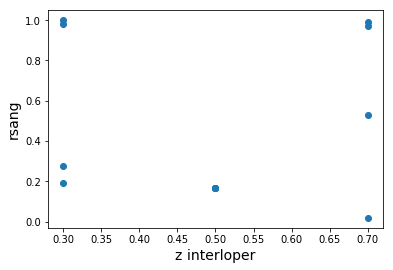

In [7]:
plt.plot(zds, [10**pf.pos[0] for pf in pso_fit_list], 'o')
#plt.axhline(y=2, color='r', linestyle='-')
plt.xlabel('z interloper', size=14)
plt.ylabel('rsang', size=14)

Text(0, 0.5, 'alphars')

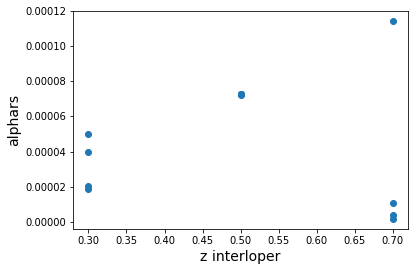

In [8]:
plt.plot(zds, [10**pf.pos[1] for pf in pso_fit_list], 'o')
#plt.axhline(y=3e-4, color='r', linestyle='-')
plt.xlabel('z interloper', size=14)
plt.ylabel('alphars', size=14)

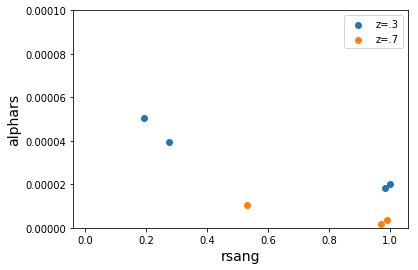

In [9]:
z3list = [pf for zd,pf in zip(zds,pso_fit_list) if abs(zd-.3)<1e-6]
z7list = [pf for zd,pf in zip(zds,pso_fit_list) if abs(zd-.7)<1e-6]

plt.scatter([10**pf.pos[0] for pf in z3list], [10**pf.pos[1] for pf in z3list], label='z=.3')
plt.scatter([10**pf.pos[0] for pf in z7list], [10**pf.pos[1] for pf in z7list], label='z=.7')
plt.xlabel('rsang', size=14)
plt.ylabel('alphars', size=14)
plt.ylim(0,.0001)
plt.legend()

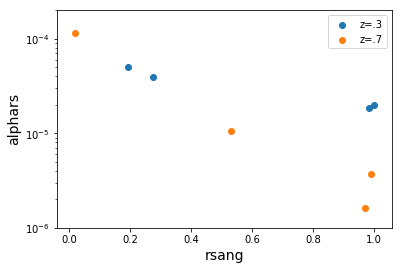

In [10]:
z3list = [pf for zd,pf in zip(zds,pso_fit_list) if abs(zd-.3)<1e-6]
z7list = [pf for zd,pf in zip(zds,pso_fit_list) if abs(zd-.7)<1e-6]

plt.scatter([10**pf.pos[0] for pf in z3list], [10**pf.pos[1] for pf in z3list], label='z=.3')
plt.scatter([10**pf.pos[0] for pf in z7list], [10**pf.pos[1] for pf in z7list], label='z=.7')
plt.xlabel('rsang', size=14)
plt.ylabel('alphars', size=14)
plt.gca().set_yscale('log')
plt.ylim(1e-6,2e-4)
plt.legend()

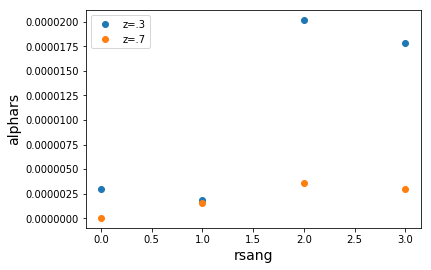

In [11]:
z3list = [pf for zd,pf in zip(zds,pso_fit_list) if abs(zd-.3)<1e-6]
z7list = [pf for zd,pf in zip(zds,pso_fit_list) if abs(zd-.7)<1e-6]

plt.plot([10**(2*pf.pos[0]) * 10**pf.pos[1] for pf in z3list], 'o', label='z=.3')
plt.plot([10**(2*pf.pos[0]) * 10**pf.pos[1] for pf in z7list], 'o', label='z=.7')
plt.xlabel('rsang', size=14)
plt.ylabel('alphars', size=14)
#plt.ylim(0,.0001)
plt.legend()

In [12]:
masses_sketchy = np.array([get_mass_back(10**pf.pos[0], 10**pf.pos[1], zd, zs) for zd, pf in zip(zds, pso_fit_list)])
# todo check that this is the correct mass formula...

[0.74217021 0.46464943 4.99508399 4.43160049 1.00004345 1.00928201
 1.00000993 0.99988236 0.03953129 1.60105881 3.80378242 3.12177454]


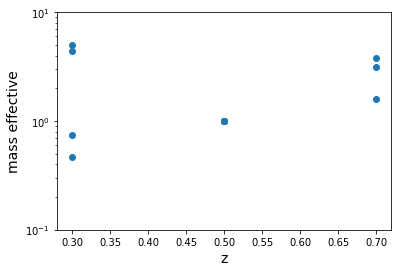

In [13]:
plt.plot(zds,masses_sketchy/1e7, 'o')
plt.xlabel('z', size=14)
plt.ylabel('mass effective', size=14)
#plt.ylim(0,3)
plt.gca().set_yscale('log')
plt.ylim(1e-1,1e1)

print(masses_sketchy/1e7)

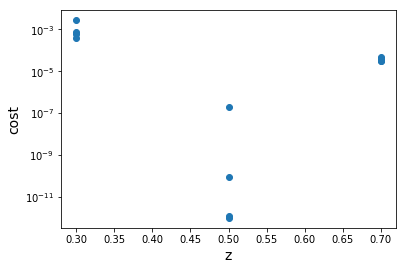

In [14]:
plt.plot(zds,[pf.cost for pf in pso_fit_list], 'o')
plt.xlabel('z', size=14)
plt.ylabel('cost', size=14)
plt.gca().set_yscale('log')

zd 0.3 (0.0007561491428406752)


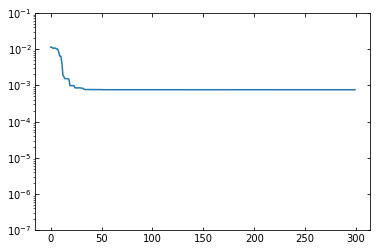

zd 0.3 (0.0027566788867552532)


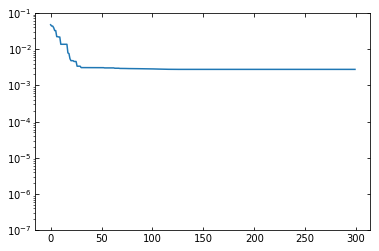

zd 0.3 (0.0004076283008392897)


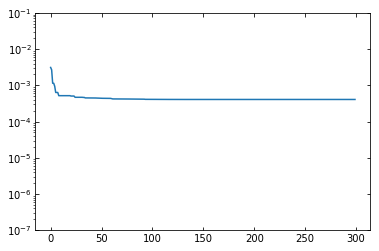

zd 0.3 (0.0005889703304461619)


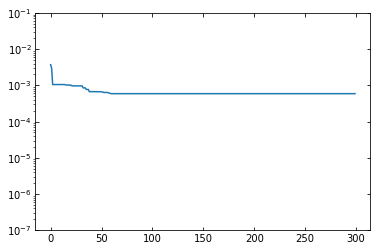

zd 0.5 (1.2832136453028472e-12)


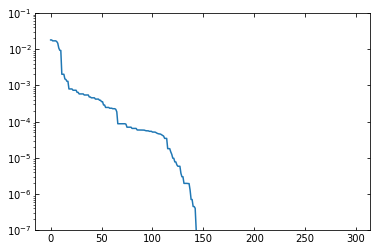

zd 0.5 (2.0046036586151187e-07)


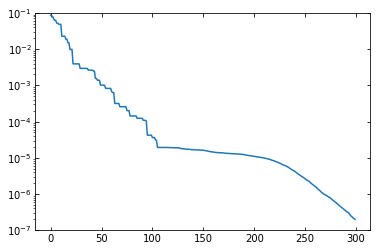

zd 0.5 (9.43414012418321e-11)


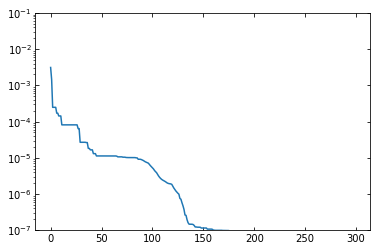

zd 0.5 (1.0062793703419081e-12)


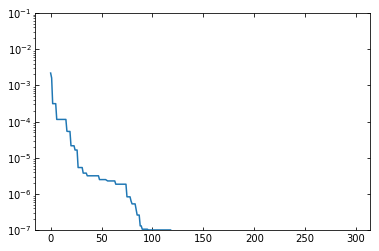

zd 0.7 (4.696507283054719e-05)


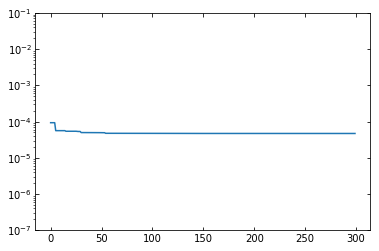

zd 0.7 (3.6912432153586945e-05)


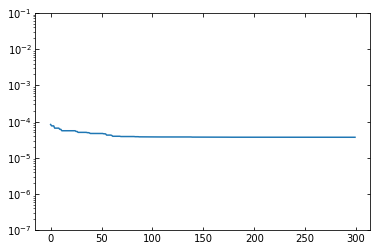

zd 0.7 (3.060051817143327e-05)


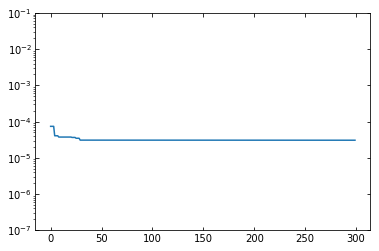

zd 0.7 (2.9864619568741174e-05)


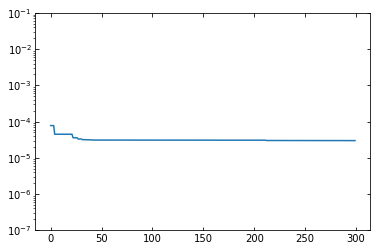

In [15]:
for zd, pso_fit in zip(zds, pso_fit_list):
    print('zd',zd, '({})'.format(pso_fit.cost))
    plt.plot(pso_fit.cost_history)
    plt.gca().set_yscale('log')
    plt.gca().tick_params(right=True, top=True, direction='in')
    plt.ylim(1e-7,.1)
    plt.show()

cost 0.0007561491428406752
[-0.5611796406050316, -4.40168627307751, -9.239833926930402, -4.294637803512433]
[0.22528796282227068, 7.942824217928143e-05, array(-9.10479303), array(-4.33113022)]


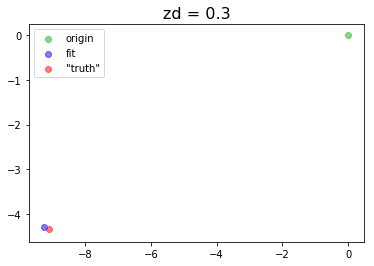

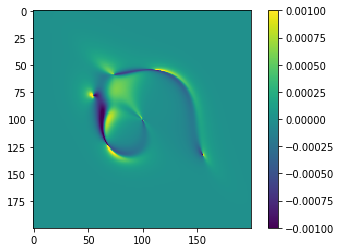

cost 0.0027566788867552532
[-0.7144114865749238, -4.298600695512406, -4.58917630414525, -9.173352166572016]
[0.22528796282227068, 7.942824217928143e-05, array(-4.59328461), array(-9.15472555)]


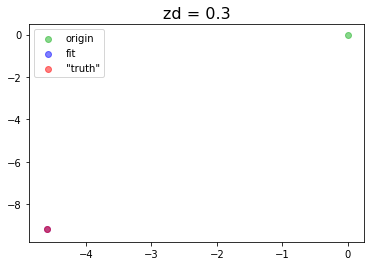

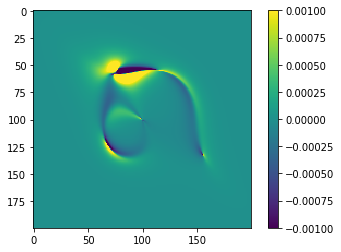

cost 0.0004076283008392897
[-0.0001318285441334781, -4.695742620677609, 4.299696389038412, 8.689281713884634]
[0.22528796282227068, 7.942824217928143e-05, array(4.54429335), array(8.81100711)]


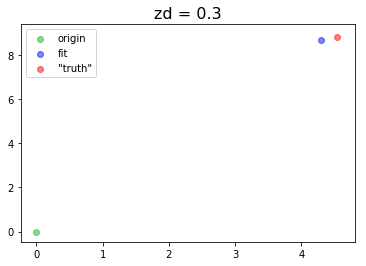

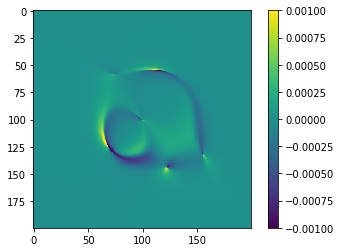

cost 0.0005889703304461619
[-0.007407765266610763, -4.733172940714392, 0.9269464443406307, 8.948177572213512]
[0.22528796282227068, 7.942824217928143e-05, array(1.26729518), array(9.23638392)]


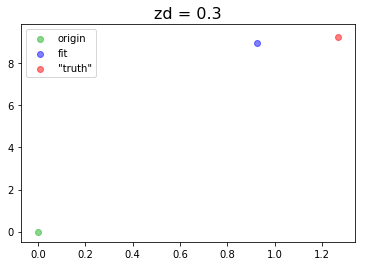

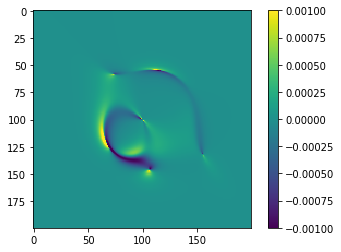

cost 1.2832136453028472e-12
[-0.783212762265633, -4.1382103199769285, -9.104778900118978, -4.331114490920654]
[0.1647295558763404, 7.274484653964194e-05, array(-9.10479303), array(-4.33113022)]


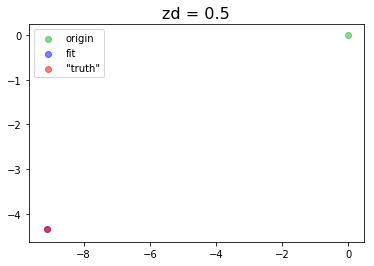

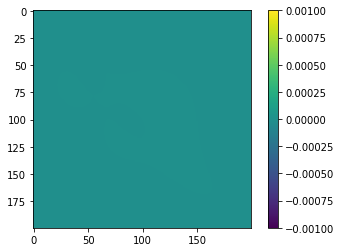

cost 2.0046036586151187e-07
[-0.7803353337997225, -4.1399715147579315, -4.593285540685335, -9.154578737415335]
[0.1647295558763404, 7.274484653964194e-05, array(-4.59328461), array(-9.15472555)]


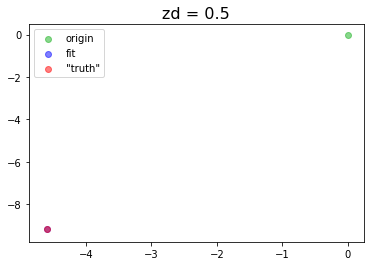

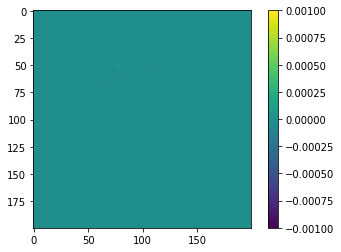

cost 9.43414012418321e-11
[-0.7832281197640991, -4.138194159636016, 4.54402000736989, 8.810603384032964]
[0.1647295558763404, 7.274484653964194e-05, array(4.54429335), array(8.81100711)]


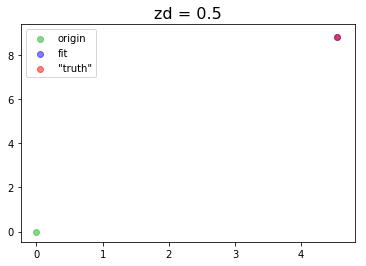

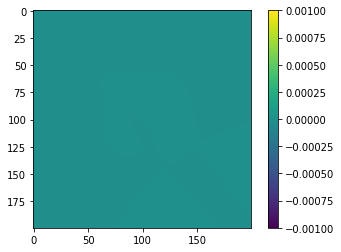

cost 1.0062793703419081e-12
[-0.7832760651443527, -4.138153675313587, 1.267332966386479, 9.236402000278513]
[0.1647295558763404, 7.274484653964194e-05, array(1.26729518), array(9.23638392)]


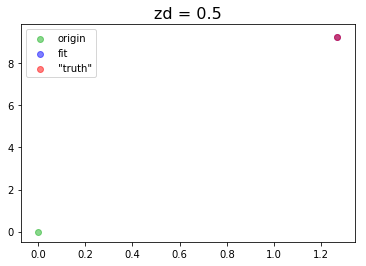

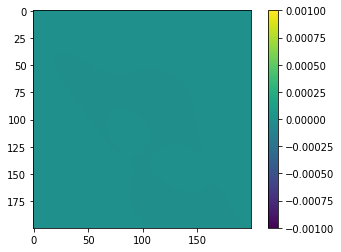

cost 4.696507283054719e-05
[-1.7413412156040922, -3.942096644079867, -14.989911283519204, -1.1906472880729766]
[0.14096253852713608, 4.7870998638027694e-05, array(-20.04016133), array(-9.53306112)]


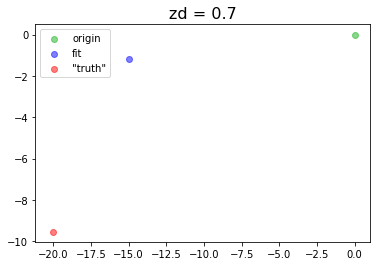

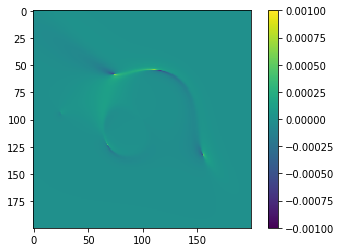

cost 3.6912432153586945e-05
[-0.012868233395512352, -5.791576336294291, -2.0534217254506406, -14.555588588039118]
[0.14096253852713608, 4.7870998638027694e-05, array(-10.11007766), array(-20.15006562)]


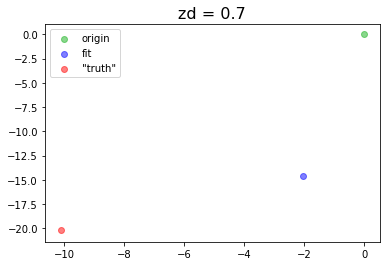

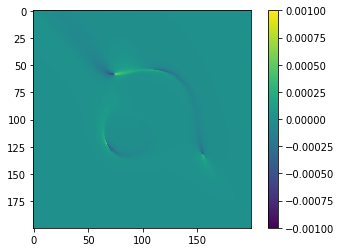

cost 3.060051817143327e-05
[-0.004009527449430728, -5.433485366052071, 0.2603839187288523, 14.692077800814076]
[0.14096253852713608, 4.7870998638027694e-05, array(10.00224514), array(19.39352199)]


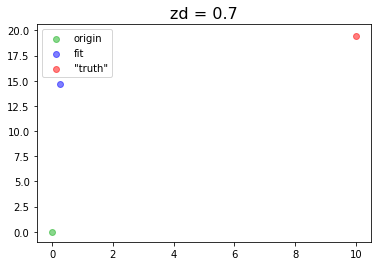

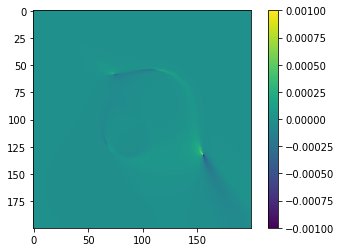

cost 2.9864619568741174e-05
[-0.27446714244213954, -4.978384269487188, -2.4196824336073357, 14.847267445077115]
[0.14096253852713608, 4.7870998638027694e-05, array(2.78938794), array(20.32980028)]


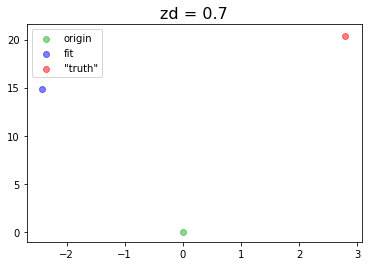

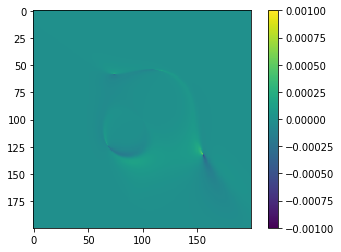

In [16]:
vmin = -.001; vmax=.001
for zd,pf in zip(zds, pso_fit_list):
    nfw_idx = 2 if zl < zd else 1 # index of first nfw lens
    almost_truth_args = ([pf.image_obj.rsang, pf.image_obj.alphars]
                     +[pf.image_obj.kwargs_lens[nfw_idx+i]['center_x'] for i in range(pf.N)]
                     +[pf.image_obj.kwargs_lens[nfw_idx+i]['center_y'] for i in range(pf.N)])
    print('cost', pf.cost)
    print(list(pf.pos))
    print(list(almost_truth_args))
    
    plt.scatter([0],[0], color='xkcd:green', label='origin', alpha=.5)
    for idx in range(2,2+pf.N):
        plt.scatter(pf.pos[idx],pf.pos[idx+pf.N], color='blue', alpha=.5,
                    label='fit' if idx==2 else None)
        plt.scatter(almost_truth_args[idx], almost_truth_args[idx+pf.N], color='red', alpha=.5,
                    label='"truth"' if idx==2 else None)
    plt.legend()
    plt.title('zd = {}'.format(zd),fontsize=16)
    plt.show()
    
    masked = pf.image-pf.pso_img
    masked[100][100] = 0
    plt.imshow(masked, vmin=vmin, vmax=vmax); plt.colorbar()
    plt.show()

In [17]:
almost_truth_args

[0.14096253852713608,
 4.7870998638027694e-05,
 array(2.78938794),
 array(20.32980028)]

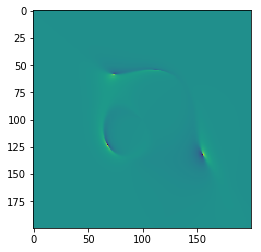

In [18]:
plt.imshow(pso_fit.almost_truth_img - pso_fit.image, vmin=vmin, vmax=vmax)

In [19]:
get_mass_back(almost_truth_args[0], almost_truth_args[1], .5, 1)

4818752.5427926

In [20]:
# import pickle
# with open('pso_fit_list2.p', 'wb') as f:
#     pickle.dump(pso_fit_list, f)

## Old cells...

In [21]:
def partition(liszt, n):
    ''' Divides a list `liszt` into `n` nearly equal parts 
    (useful for pooling)'''
    lenliszt = len(liszt)
    short = lenliszt//n # how long is a short part
    nlong = lenliszt - short*n # remainder after integer division
    
    # list of lengths
    length_list = [short]*(n-nlong) + [short+1]*nlong
    
    ans = []
    counter = 0
    for length in length_list:
        ans.append(liszt[counter:counter+length])
        counter += length
        
    return ans    